# Projet de science des données analysant les accidents d'aviation de 1962 à 2023

## 🎯 Objectif
Déterminer quels aéronefs présentent le risque le plus faible pour l'entreprise afin de l’aider à démarrer son activité dans l’aviation en toute sécurité.

## 🧠 Contexte
Une entreprise souhaite entrer sur le marché des services d’aviation (privée et/ou commerciale). Elle veut prendre des décisions basées sur des faits historiques concernant les accidents.

## ❓ Questions Clés
- Quels types d’aéronefs ont été impliqués dans le plus d’accidents ?
- Y a-t-il des périodes de l’année plus risquées ?
- Quels modèles ou opérateurs sont associés à des taux élevés de mortalité ?


#### Pour cela nous allons utiliser les bibliotèque comme:
   - *Numpy*
   - *Pandas*
   - *Matplotlib*

In [ ]:
#importons les bibliotèque 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Partie 1: Pandas 
##### Netoyage de donnée

1.1 *Lire AviationData.csv dans un DataFrame pandas nommé df*

In [ ]:
#J'utilise low_memory=False pour gérer l'avertissement des colonne qui ont des lignes multi type

df = pd.read_csv("../data/raw/AviationData.csv", encoding='latin1', low_memory=False)

1.3 *Supprimer la colonne Event.Id*

In [ ]:
df.drop('Event.Id', axis=1, inplace=True)

1.2 *Verifier les types de donné des colonnes*

In [ ]:
df.dtypes

1.3 *Suppression des colonnes inutiles*

In [ ]:
df.drop(["Location",
"Latitude",
"Longitude",
"Airport.Code",
"Airport.Name",
"Registration.Number",
"Air.carrier",
"Report.Status",
"Schedule",
"Accident.Number",
"Event.Date",
"Country",
"Number.of.Engines",
"Publication.Date"], axis=1, inplace=True)

 1.4 *Groupons par la colonne "Make" pour voir quel fabricant qui a construit plus de aeronef*  

In [ ]:
df['Make'].value_counts().reset_index()

1.5 *Remplacons les valeur manquant par "Cessna"*

In [ ]:
df["Make"]= df['Make'].fillna("Cessna")

1.6 *Verifier si il y a toujours de valeur nan*

In [ ]:
df['Make'].value_counts(dropna=False)

1.7 *Faisons la meme chose pour la colonne Model*

In [ ]:
modele_plus_frequent = df['Model'].mode()[0]
df["Model"]= df["Model"].fillna(modele_plus_frequent)

1.8 *Créer une nouvelle colonne pour identifier l'aeronef par un nom*

In [ ]:
df["Nom_Aeronef"]= df["Make"]+ " " +df["Model"]

1.9 *Supprimer ces deux colonnes "Make" et "Model"*

In [ ]:
df.drop(["Make", "Model"], axis=1, inplace=True)

#### 2.0 *Remplacer les valeurs manquent pour les autres colonnes*

In [ ]:
#Remplire les valeurs manquent de la colonne Aircraft.Category avec "Unknow"
df["Aircraft.Category"]=df["Aircraft.Category"].fillna("Unknow")

In [ ]:
#Remplire les valeurs manquent de la colonne FAR.Description avec "Unknow"
df["FAR.Description"]=df["FAR.Description"].fillna("Unknow")

In [ ]:
#Remplire les valeurs manquent de la colonne Injury.Severity avec "Unknow"
df["Injury.Severity"]=df["Injury.Severity"].fillna("Unknow")

In [ ]:
#Remplire les valeurs manquent de la colonne Aircraft.damage avec "Unknow"
df["Aircraft.damage"]=df["Aircraft.damage"].fillna("Unknow")

In [ ]:
#Remplire les valeurs manquent de la colonne Amateur.Built avec "No" , il s'agit d'une variable catégorielle
df["Amateur.Built"]=df["Amateur.Built"].fillna("No")

In [ ]:
#Remplire les valeurs manquent de la colonne Engine.Type avec "Unknow"
df["Engine.Type"]=df["Engine.Type"].fillna("Unknow")

In [ ]:
#Remplire les valeurs manquent de la colonne Purpose.of.flight avec "Unknow"
df["Purpose.of.flight"]=df["Purpose.of.flight"].fillna("Unknow")

In [ ]:
#Remplire les valeurs manquent de la colonne Weather.Condition avec "Unknow"
df["Weather.Condition"]=df["Weather.Condition"].fillna("Unknow")

In [ ]:
#Remplire les valeurs manquent de la colonne Broad.phase.of.flight avec "Unknow"
df["Broad.phase.of.flight"]=df["Broad.phase.of.flight"].fillna("Unknow")

#### 2.1 Avant de remplacer les valeurs manquent on doit d'abord convertir les Float en Int64

In [ ]:
#convertit la colonne Total.Fatal.Injuries en Int64
df["Total.Fatal.Injuries"] = df["Total.Fatal.Injuries"].astype('Int64')

#Remplacer les valeurs manquent par 0
df["Total.Fatal.Injuries"] = df["Total.Fatal.Injuries"].fillna(0)

In [ ]:
#convertit la colonne Total.Serious.Injuries en Int64
df["Total.Serious.Injuries"] = df["Total.Serious.Injuries"].astype('Int64')

#Remplacer les valeurs manquent par 0
df["Total.Serious.Injuries"] = df["Total.Serious.Injuries"].fillna(0)

In [ ]:
#convertit la colonne Total.Minor.Injuries en Int64
df["Total.Minor.Injuries"] = df["Total.Minor.Injuries"].astype('Int64')

#Remplacer les valeurs manquent par 0
df["Total.Minor.Injuries"] = df["Total.Minor.Injuries"].fillna(0)

In [ ]:
#convertit la colonne Total.Uninjured en Int64
df["Total.Uninjured"] = df["Total.Uninjured"].astype('Int64')
#Remplacer les valeurs manquent par 0
df["Total.Uninjured"] = df["Total.Uninjured"].fillna(0)

Créer une colonne "Total_F-S_Injuries" (Total Fatal Serious Injuries) 

In [ ]:
df["Total_F-S_Injuries"] = df["Total.Fatal.Injuries"] + df["Total.Serious.Injuries"]

Maintenant supprimer ces deux colonne "Total.Fatal.Injuries" et "Total.Serious.Injuries"

In [ ]:
df.drop(["Total.Fatal.Injuries","Total.Serious.Injuries"], axis=1, inplace=True)

#### Partie 3: L'analyse exploratoire

#### Prenons les hypothèse suivants  
                            
                            1. Certains types ou modèles d’aéronefs sont plus souvent impliqués dans des accidents graves
                            2. Certains fabricants produisent des aéronefs plus sûrs.
                            3. Les avions avec peu ou pas de blessures graves sont moins risqués.

A. Total_F-S.Injuries

- Moyenne par Aircraft.Category

In [576]:
df.groupby("Aircraft.Category")["Total_F-S_Injuries"].mean().sort_values()

Aircraft.Category
Blimp                     0.0
ULTR                      0.0
UNK                       0.0
Powered-Lift              0.2
Glider               0.417323
Gyrocraft            0.572254
Powered Parachute    0.604396
Ultralight                0.7
Weight-Shift         0.776398
Unknow               0.789583
Helicopter           0.819186
Airplane             0.843357
Balloon              0.991342
Rocket                    1.0
WSFT                 1.222222
Unknown              1.642857
Name: Total_F-S_Injuries, dtype: Float64

- Moyenne par Nom_Aeronef (constructeur) 

In [ ]:
df.groupby("Nom_Aeronef")["Total_F-S_Injuries"].mean().sort_values()

- Fréquence des accidents par catégorie

In [578]:
df["Aircraft.Category"].value_counts(normalize=True) *100

Aircraft.Category
Unknow               63.677170
Airplane             31.069086
Helicopter            3.869995
Glider                0.571499
Balloon               0.259875
Gyrocraft             0.194625
Weight-Shift          0.181125
Powered Parachute     0.102375
Ultralight            0.033750
Unknown               0.015750
WSFT                  0.010125
Powered-Lift          0.005625
Blimp                 0.004500
UNK                   0.002250
Rocket                0.001125
ULTR                  0.001125
Name: proportion, dtype: float64

- Fréquence des accidents par Nom_Aeronef

In [572]:
df["Nom_Aeronef"].value_counts(normalize=True)

Nom_Aeronef
Cessna 152                  0.024885
Cessna 172                  0.014107
Cessna 172N                 0.011205
Piper PA-28-140             0.009135
Cessna 150                  0.008055
                              ...   
Beech KINGAIR 300           0.000011
Sid Champion JURCA MJ-5     0.000011
Univair 7GC-AA              0.000011
Michael L. Thibault RV-4    0.000011
ROYSE RALPH L GLASAIR       0.000011
Name: proportion, Length: 20179, dtype: float64

#### Partie 4: Visualisation

 A) Barplot des blessures moyennes par catégorie d’aéronef

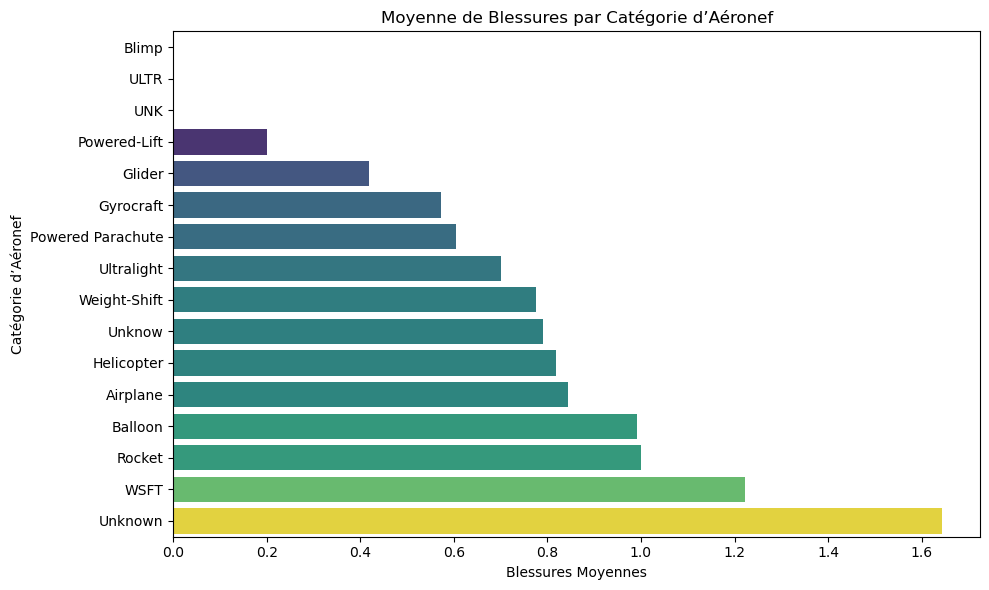

In [604]:
# Calculer les moyennes de blessures par catégorie d’aéronef
avg_injuries = df.groupby("Aircraft.Category")["Total_F-S_Injuries"].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=avg_injuries.values, y=avg_injuries.index, hue=avg_injuries.values, palette="viridis", dodge=False, legend=False)
plt.title("Moyenne de Blessures par Catégorie d’Aéronef")
plt.xlabel("Blessures Moyennes")
plt.ylabel("Catégorie d’Aéronef")
plt.tight_layout()
plt.savefig("moyenne_blessures_par_categorie.png", dpi=300, bbox_inches='tight')
plt.show()

#### On observe que Blimp,Ultr et Unk n'ont pas subir des accidents mais peut utiliser pas sur pour un projet d'achat,
#### Mais les cotegories Powered-lift et Glider sont très peu graves


B) Pie chart (répartition des catégories)

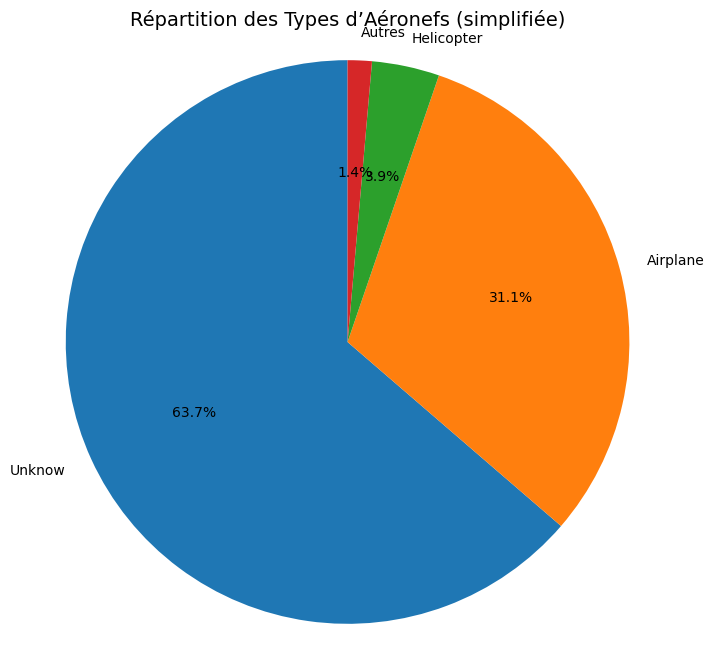

In [614]:
# Regrouper les petites catégories sous 'Autres' (par exemple si < 2%)
cat_counts = df["Aircraft.Category"].value_counts(normalize=True)
cat_major = cat_counts[cat_counts > 0.02]
cat_minor = cat_counts[cat_counts <= 0.02]
cat_major["Autres"] = cat_minor.sum()

# Création du pie chart
plt.figure(figsize=(8, 8))
plt.pie(cat_major, labels=cat_major.index, autopct='%1.1f%%', startangle=90)
plt.title("Répartition des Types d’Aéronefs (simplifiée)", fontsize=14)
plt.axis('equal') 
plt.savefig("Répartion_des_type_daeroef.png", dpi=300, bbox_inches='tight')
plt.show()

#### Cette Pie chart represente l'ensemble de categorie,qui a une forte categorie indefini suivit des Airplane a 31.1% et les helicopter a 3.9%
#### ca prouve que ce sont deux categories les plus accidentés

Boxplot (blessures par modèle d’aéronef) :

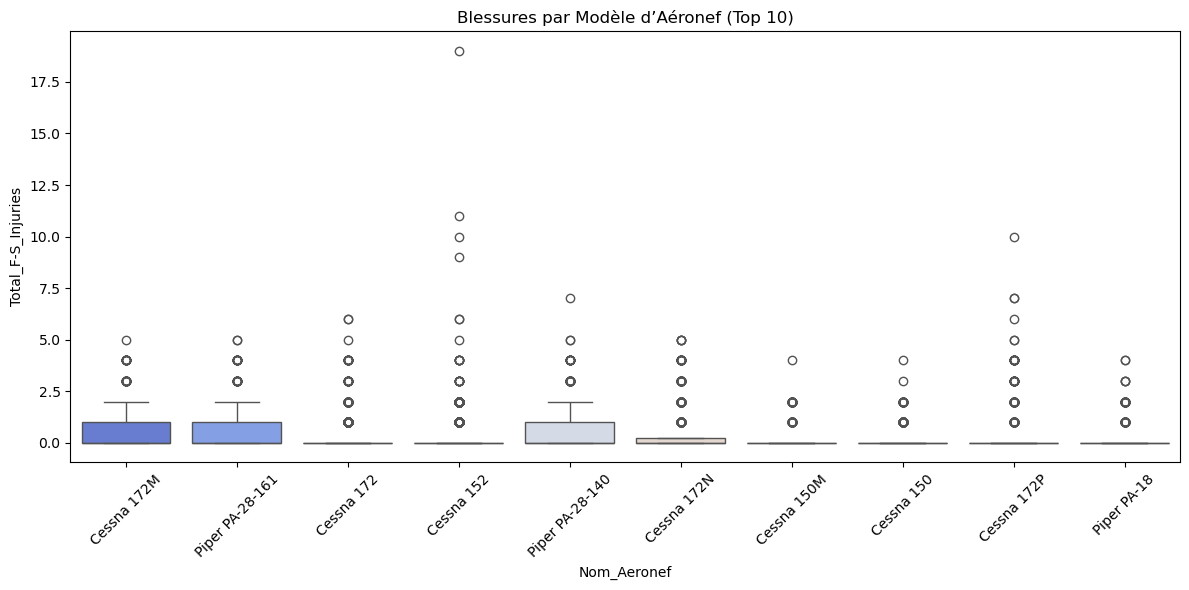

In [608]:
top_models = df["Nom_Aeronef"].value_counts().head(10).index
filtered_df = df[df["Nom_Aeronef"].isin(top_models)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x="Nom_Aeronef", y="Total_F-S_Injuries", hue="Nom_Aeronef",  palette="coolwarm", dodge=False)
plt.title("Blessures par Modèle d’Aéronef (Top 10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Blessures_par_modele_daeroef.png", dpi=300, bbox_inches='tight')
plt.show()

##### résultat veut dire que ces 10 modèles sont les plus souvent impliqués dans les données d’accidents.
##### Mais attention : cela peut aussi simplement refléter qu’ils sont très répandus (donc utilisés souvent), pas forcément qu’ils sont dangereux.


##### 🟢 Conclusion stratégique pour l'entreprise :
Pour minimiser les risques lors du démarrage d’une activité aérienne, il est préférable de choisir des aéronefs :

🎯 Recommandés:

Categories: Glider,Powered-Lift 

Constructeur: Piper PA-18/Cessna 150 → malgré leur fréquence, leurs gravités sont plus basses que les gros porteurs.

🚫 À éviter :

Tupolev TU-154, Boeing 747, Airbus A310, etc. → Très graves accidents ➤ forte mortalité.